In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests


# 1- Data Exploration

In [2]:
df = pd.read_csv("Online-Retail.csv")
data = df.copy()

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
data.shape

(541909, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# Check the missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# 2- Data Cleaning

In [8]:
# Drop rows with missing values in 'Description' and 'CustomerID' columns
data.dropna(subset=['Description', 'CustomerID'], inplace=True)

In [9]:
# Check again the new dataframe
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
# rename all the Columns
data_df= data.rename(columns={"InvoiceNo":"invoice_num", 
                   "StockCode":"stock_code", 
                  "Description":"description", 
                  "Quantity":"quantity", 
                  "InvoiceDate":"invoice_date", 
                  "UnitPrice":"unit_price", 
                  "CustomerID":"customer_id", 
                  "Country":"country"}, inplace=True)


In [11]:
# Convert InvoiceDate to datetime
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

In [12]:
data.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
# the Datatypes from all the columns
data.dtypes

invoice_num             object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id            float64
country                 object
dtype: object

In [14]:
# convert the column description to string
data["description"] = data["description"].astype(str)

In [15]:
# convert the description column into lower case
data['description'] = data.description.str.lower()

In [16]:
# Round values to 2 decimal places
data.describe().round(2)

,quantity,unit_price,customer_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [18]:
data.shape

(406829, 8)

In [19]:
data.duplicated().sum()

5225

In [20]:
data_df = data.drop_duplicates()

In [21]:
data_df.shape

(401604, 8)

In [22]:
data_df.columns

Index(['invoice_num', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [23]:
# Quantity smaller than 0
data_filter = data[data['quantity'] < 0]
data_filter

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,zinc t-light holder stars small,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,victorian sewing box large,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,hanging heart jar t-light holder,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [24]:
data_df['description'].to_frame()

,description
0,white hanging heart t-light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart.
...,...
541904,pack of 20 spaceboy napkins
541905,children's apron dolly girl
541906,childrens cutlery dolly girl
541907,childrens cutlery circus parade


In [25]:
data_df['description'].nunique()

3896

In [26]:
discounts = data_df[data_df['stock_code'].apply(lambda order: order=='D')]
discounts.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom


In [27]:
discounts.shape

(77, 8)

In [28]:
post = data[data['stock_code'].apply(lambda order: order=='POST')]
post.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,postage,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,postage,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,postage,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5073,536840,POST,postage,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,postage,1,2010-12-03 09:51:00,18.0,12686.0,France


In [29]:
post.shape

(1196, 8)

In [30]:
manuel = data[data['stock_code'].apply(lambda order: order=='M')]
manuel.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
2239,536569,M,manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
6798,536981,M,manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
8530,537137,M,manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom


In [31]:
manuel.shape

(465, 8)

In [32]:
pads = data[data['stock_code'].apply(lambda order: order=='PADS')]
pads.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
157195,550193,PADS,pads to match all cushions,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,pads to match all cushions,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
358655,568158,PADS,pads to match all cushions,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom
359871,568200,PADS,pads to match all cushions,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom


In [33]:
pads.shape

(4, 8)

In [34]:
carriage = data[data['stock_code'].apply(lambda order: order=='C2')]
carriage.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
1423,536540,C2,carriage,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
12119,537368,C2,carriage,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
12452,537378,C2,carriage,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
19975,537963,C2,carriage,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom
20016,538002,C2,carriage,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands


In [35]:
carriage.shape

(134, 8)

In [36]:
bank = data[data['stock_code'].apply(lambda order: order=='BANK CHARGES')]
bank.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
4406,536779,BANK CHARGES,bank charges,1,2010-12-02 15:08:00,15.0,15823.0,United Kingdom
62508,541505,BANK CHARGES,bank charges,1,2011-01-18 15:58:00,15.0,15939.0,United Kingdom
152966,549717,BANK CHARGES,bank charges,1,2011-04-11 14:56:00,15.0,14606.0,United Kingdom
175275,551945,BANK CHARGES,bank charges,1,2011-05-05 11:09:00,15.0,16714.0,United Kingdom
327921,565735,BANK CHARGES,bank charges,1,2011-09-06 12:25:00,15.0,16904.0,United Kingdom


In [37]:
bank.shape

(12, 8)

In [38]:
data_df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
lantern = data_df[data_df['description'].apply(lambda order: order=='white metal lantern')]
lantern

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
50,536373,71053,white metal lantern,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom
67,536375,71053,white metal lantern,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom
279,536396,71053,white metal lantern,6,2010-12-01 10:51:00,3.39,17850.0,United Kingdom
417,536406,71053,white metal lantern,8,2010-12-01 11:33:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
467347,576339,71053,white metal lantern,1,2011-11-14 15:27:00,8.29,14096.0,United Kingdom
468547,576513,71053,white metal lantern,8,2011-11-15 12:10:00,3.75,14715.0,United Kingdom
471383,576642,71053,white metal lantern,4,2011-11-16 09:59:00,3.75,12963.0,United Kingdom
471907,576654,71053,white metal lantern,1,2011-11-16 10:55:00,3.75,15584.0,United Kingdom


In [40]:
# import requests

# url = "https://amazon-data.p.rapidapi.com/search.php"

# querystring = {"keyword":"set 7 babushka nesting boxes","region":"us","page":"1"}

# headers = {
#     "X-RapidAPI-Key": "8a6dcc8cffmshe0cb2df6a87e7afp1c68bdjsnaf5057047f7c",
#     "X-RapidAPI-Host": "amazon-data.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# print(response.json())

In [42]:
#res = response.json()

In [52]:

#res[0]['asin_name']

'Kate Aspen Rustic Farmhouse Decor White Candle Holder Lantern Decorative (7.5 Inch), Wedding Decoration, Centerpiece Table Decorations, Home Decor, Shelf Decor'

In [53]:
#res[0]['asin_price']

17.89

In [54]:
# # test
# import requests
# import time
# import pandas as pd

# url = "https://amazon-data.p.rapidapi.com/search.php"

# headers = {
#     "X-RapidAPI-Key": "8a6dcc8cffmshe0cb2df6a87e7afp1c68bdjsnaf5057047f7c",
#     "X-RapidAPI-Host": "amazon-data.p.rapidapi.com"
# }
# amazon_price, amazon_product_description = [], []

# for index, item in data_df.iterrows():
    
#     if index < 3:
#         querystring = {"keyword":item['description'],"region":"us","page":"1"}
#         response = requests.get(url, headers=headers, params=querystring).json()

#         print("Requete No: ", index)
#         print("Column description from dataframe: ", item['description'])
#         print("Product description from response: ",response[0]['asin_name'])
#         print("Price from response: ", response[0]['asin_price'])
#         print("======================================")
#         print(" ")
        
#         amazon_product_description.append(response[0]['asin_name'])
#         amazon_price.append(response[0]['asin_price'])
#         time.sleep(1)
        
# #data_df["Amazon Price"] = list_price
# df_test = pd.DataFrame()
# df_test = pd.DataFrame({"Amazon Price": amazon_price, "Product Description": amazon_product_description})
# print("finish!")

Requete No:  0
Column description from dataframe:  white hanging heart t-light holder
Product description from response:  Mudder Valentine's Day Wooden Heart String Lights LED Fairy Lights Hanging Wood Love Lights Lamp Battery Operated Valentine's Day Decorations for Bedroom Festival Birthday Wedding (White,20 Lights)
Price from response:  10.99
 
Requete No:  1
Column description from dataframe:  white metal lantern
Product description from response:  Kate Aspen Rustic Farmhouse Decor White Candle Holder Lantern Decorative (7.5 Inch), Wedding Decoration, Centerpiece Table Decorations, Home Decor, Shelf Decor
Price from response:  17.89
 
Requete No:  2
Column description from dataframe:  cream cupid hearts coat hanger
Product description from response:  50 Pieces Cute Heart Hangers with 360 Degree Swivel Hook Heavy Duty Clothes Hanger Adult Coat Hangers for Jackets, Pants, Shirts, Suit, Dress Room Closet Decor(Pink,Plastic)
Price from response:  40.94
 
finish!


In [55]:
df_test

,Amazon Price,Product Description
0,10.99,Mudder Valentine's Day Wooden Heart String Lig...
1,17.89,Kate Aspen Rustic Farmhouse Decor White Candle...
2,40.94,50 Pieces Cute Heart Hangers with 360 Degree S...


In [56]:
data_df.shape

(401604, 8)

In [62]:
#data_df['description'].nunique()

3896

In [ ]:
# 10.000 requests / month

In [41]:
df_amazon_data = pd.DataFrame()
df_amazon_data['description'] = data_df['description'].unique()
df_amazon_data

,description
0,white hanging heart t-light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart.
...,...
3891,"letter ""w"" bling key ring"
3892,"letter ""z"" bling key ring"
3893,pink crystal skull phone charm
3894,cream hanging heart t-light holder


In [79]:
#df_amazon_data.description[5]

'set 7 babushka nesting boxes'

In [91]:
# import requests
# import time
# import pandas as pd

# url = "https://amazon-data.p.rapidapi.com/search.php"

# headers = {
#     "X-RapidAPI-Key": "8a6dcc8cffmshe0cb2df6a87e7afp1c68bdjsnaf5057047f7c",
#     "X-RapidAPI-Host": "amazon-data.p.rapidapi.com"
# }
# amazon_price, amazon_product_description = [], []

# for item in df_amazon_data['description']:
#     querystring = {"keyword":item,"region":"us","page":"1"}
#     result = requests.get(url, headers=headers, params=querystring)
#     print(result)
#     try:
#         response = result.json()
#         amazon_product_description.append(response[0]['asin_name'])
#         amazon_price.append(response[0]['asin_price'])
#         time.sleep(0.15)
#     except:
#         print("Error:")
#         response = None
#         amazon_product_description.append(response)
#         amazon_price.append(response)
#         time.sleep(1)

# df_amazon_data.loc[:, "amazon product name"] = amazon_product_description
# df_amazon_data.loc[:, "amazon price"] = amazon_price

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
Error:
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
Error:
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
Error:
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response 

ConnectionError: ('Connection aborted.', ConnectionAbortedError(10053, 'Eine bestehende Verbindung wurde softwaregesteuert\r\ndurch den Hostcomputer abgebrochen', None, 10053, None))

In [120]:
#len(amazon_product_description)

In [94]:
# data = {
#     "amazon_product_description": amazon_product_description,
#     "amazon_price": amazon_price
# }

# df = pd.DataFrame(data)


In [95]:
#df.to_excel("df.xlsx")

In [42]:
unique_df=pd.read_excel("df.xlsx")

In [43]:
df = pd.DataFrame(unique_df)


In [44]:
df.tail()

,Unnamed: 0,amazon_product_description,amazon_price
2886,2886,NaN,0.00
2887,2887,NaN,0.00
2888,2888,NaN,0.00
2889,2889,DUSVALLY Coffee Ceramic Mug Travel Coffee Mug ...,24.29
2890,2890,"DOWAN 9.75"" Large Serving Bowls - 86 oz Cerami...",38.43


In [45]:

df = df.rename(columns={"amazon_product_description":"amazon_description"})

In [46]:
df.head()

,Unnamed: 0,amazon_description,amazon_price
0,0,Mudder Valentine's Day Wooden Heart String Lig...,10.99
1,1,Kate Aspen Rustic Farmhouse Decor White Candle...,17.89
2,2,50 Pieces Cute Heart Hangers with 360 Degree S...,40.94
3,3,ALAZA England British Flag Union Jack Hot Wate...,16.24
4,4,Revony Warm Winter Beanie - Soft Cashmere-Like...,12.89


In [101]:
df1 = df.copy()

In [102]:
df_drop = df1[df1['amazon_price'] != 0.00]

In [103]:
df_drop.shape

(2377, 3)

In [104]:
df_drop.head()

,Unnamed: 0,amazon_description,amazon_price
0,0,Mudder Valentine's Day Wooden Heart String Lig...,10.99
1,1,Kate Aspen Rustic Farmhouse Decor White Candle...,17.89
2,2,50 Pieces Cute Heart Hangers with 360 Degree S...,40.94
3,3,ALAZA England British Flag Union Jack Hot Wate...,16.24
4,4,Revony Warm Winter Beanie - Soft Cashmere-Like...,12.89


In [105]:
df_drop = df_drop.drop("Unnamed: 0", axis=1)

In [106]:
df_drop.head()

,amazon_description,amazon_price
0,Mudder Valentine's Day Wooden Heart String Lig...,10.99
1,Kate Aspen Rustic Farmhouse Decor White Candle...,17.89
2,50 Pieces Cute Heart Hangers with 360 Degree S...,40.94
3,ALAZA England British Flag Union Jack Hot Wate...,16.24
4,Revony Warm Winter Beanie - Soft Cashmere-Like...,12.89


In [107]:
data_df


,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amazon price,amazon description
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,10.99,Mudder Valentine's Day Wooden Heart String Lig...
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17.89,Kate Aspen Rustic Farmhouse Decor White Candle...
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,40.94,50 Pieces Cute Heart Hangers with 360 Degree S...
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,16.24,ALAZA England British Flag Union Jack Hot Wate...
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12.89,Revony Warm Winter Beanie - Soft Cashmere-Like...
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,26.27,HIPVVILD Outer Space Plates And Napkins Party ...
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,18.34,"2 Pcs Kids Lemon Apron, Kids Apron with Pocket..."
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,NaN
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,NaN


In [108]:
len(df_amazon_data) ,len(df_drop)


(3896, 2377)

In [109]:
df_drop['description'] = df_amazon_data['description'].iloc[:2377]

In [110]:
df_drop['description'].shape

(2377,)

In [ ]:
df_drop

In [87]:
df_drop['description'].reset_index(drop=True)

0        white hanging heart t-light holder
1                       white metal lantern
2            cream cupid hearts coat hanger
3       knitted union flag hot water bottle
4            red woolly hottie white heart.
                       ...                 
2372                                    NaN
2373                                    NaN
2374                                    NaN
2375                                    NaN
2376                                    NaN
Name: description, Length: 2377, dtype: object

In [112]:
df_drop.reset_index(drop=True, inplace=True)

In [73]:
#df_drop.drop(columns ='description', inplace= True)

In [117]:
df_drop

,amazon_description,amazon_price,description
0,Mudder Valentine's Day Wooden Heart String Lig...,10.99,white hanging heart t-light holder
1,Kate Aspen Rustic Farmhouse Decor White Candle...,17.89,white metal lantern
2,50 Pieces Cute Heart Hangers with 360 Degree S...,40.94,cream cupid hearts coat hanger
3,ALAZA England British Flag Union Jack Hot Wate...,16.24,knitted union flag hot water bottle
4,Revony Warm Winter Beanie - Soft Cashmere-Like...,12.89,red woolly hottie white heart.
...,...,...,...
2372,"Callyne Stainless Steel Cutlery Sets, 80 Piece...",49.59,NaN
2373,"2023 New Skull Whirligig,Skull Wind Spinner,Cr...",43.84,NaN
2374,"Godinger Cake Stand, Crystal Glass Footed Cake...",36.05,NaN
2375,DUSVALLY Coffee Ceramic Mug Travel Coffee Mug ...,24.29,NaN


In [114]:
# Create a mapping dictionary from df_drop

price_maping = df_drop.set_index('description')['amazon_price'].to_dict()
description_maping = df_drop.set_index('description')['amazon_description'].to_dict()


In [115]:
# Update a column in data_df using the mapping

data_df.loc[:, 'amazon price'] = data_df['description'].map(price_maping)
data_df.loc[:, 'amazon description'] = data_df['description'].map(description_maping)

C:\Users\Kameta\anaconda3\envs\deeplearning2020\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [116]:
data_df

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amazon price,amazon description
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,10.99,Mudder Valentine's Day Wooden Heart String Lig...
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17.89,Kate Aspen Rustic Farmhouse Decor White Candle...
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,40.94,50 Pieces Cute Heart Hangers with 360 Degree S...
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,16.24,ALAZA England British Flag Union Jack Hot Wate...
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12.89,Revony Warm Winter Beanie - Soft Cashmere-Like...
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,26.27,HIPVVILD Outer Space Plates And Napkins Party ...
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,18.34,"2 Pcs Kids Lemon Apron, Kids Apron with Pocket..."
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,NaN
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,NaN


In [118]:
data_new = data_df.copy()

In [119]:
data_new.dropna(inplace = True)

In [121]:
data_new

(242959, 10)

In [122]:
import pandas as pd
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kameta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kameta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [159]:
pip install nltk

In [123]:
#2 nd trial

# Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


def preprocess_text(text):
    # Check if text is a string, and if not, return an empty list
    if not isinstance(text, str):
        return []

    words = nltk.word_tokenize(text.lower())
    words = [stemmer.stem(word)
             for word in words if word.isalpha() and word not in stop_words]
    return words


# Frequency Analysis
all_words = []
for desc in data_new['description']:
    words = preprocess_text(desc)
    all_words.extend(words)

word_freq = Counter(all_words)

# Keyword Selection (top 5 keywords)
top_keywords = [word for word, freq in word_freq.most_common(15)]

print(top_keywords)

['red', 'retrospot', 'set', 'heart', 'bag', 'box', 'pink', 'design', 'cake', 'white', 'metal', 'vintag', 'blue', 'hang', 'pack']


In [124]:
# Categorization (example mapping)
category_keywords = {
    'Decor': ['hang', 'holder', 'design', 'metal', 'ceramic', 'ornament', 'lantern', 'frame', 'knob', 'clock',  'LIGHT',  'HANGER', 'doiley',  'WALL DECOR',  'CANDLEHOLDER', 'CUSHION', 'VASE', 'quilt', 'ballons', 'doormat', 'CANDLE', 'CHRISTMAS', 'RACK', 'ALUMINIUM', 'STAR', 'KEY FOB', 'DRAWER', 'MAT', 'WICKER', 'SHELF', 'CABINET', 'STOOL', 'SPACE OWL', 'MIRROR', 'HOOK', 'INCENSE', 'DOORSTOP', 'EASTER', 'DECORATIONS', 'BABUSHKA', 'DOORSIGN', 'FLYING DUCKS', 'ART', 'PHOTO CUBE','SIGN'],
    'Stationery': ['paper', 'postage', 'pencil', 'Craft', 'pen', 'pencils', 'postage', 'blocks',  'paper', 'NOTEBOOK', 'PENS', 'erasers', 'STICKY NOTES', 'SCISSOR',  'MARKERS', 'FILE FOLDERS', 'BINDERS', 'STAMP SET', 'book', 'ribbon', 'LETTER ', 'STATIONERY', 'WRAP', 'CHALKBOARD', 'ruler', ' ORGANISER', 'WRITING'],
    'Kitchenware': ['cake', 'case', 'bottle', 'cutlery',   'mug', 'cake', 'cup', 'saucer', 'jug', 'beakers',  'bottle', 'plate', 'jar', 'KNIFE', 'CUTTING BOARD', 'diner', 'cookie', 'doilies', 'matches', 'bag', 'pannetone',  'apron',  'glass', 'POT',  'UTENSIL', 'COOKWARE SET',  'SPOON', 'BOWL',  'KITCHEN TOWEL',  'moulds',  'placemats',  'popcorn', 'HERB', 'CHOPPING BOARD', 'MOULD', 'TEA', 'SALT AND PEPPER', 'KITCHEN SCALES', 'SNACK', 'NAPKIN', 'EGG', ' FILLER PAD', 'WASHING', 'STRAWS', 'TISSUES', 'dish', 'WREATH', 'PARASOL', 'BUBBLES', 'BREAKFAST', 'JAM', 'FRYING PAN', 'KNICK KNACK', 'TRAY', 'TIN', 'BUNNIES'],
    'Toys and Games': ['game', 'lunch box', 'toys', 'puzzles', 'ACTION FIGURE', 'PLAYSET', 'LEGO SET', 'STUFFED ANIMAL', 'marbels', 'card', 'drawing', 'calculator', 'RC CAR', 'dominoes', 'party invites', 'tattoos', 'BIRTHDAY', 'HARMONICA', 'PARTY', 'BLOCK', ' PAINT', 'LUNCH BAG', 'PLAYHOUSE', 'CROQUET', 'BALLOON', 'SANDCASTLE', 'SNAKES & LADDERS', 'SKIPPING ROPE', 'STICKER', 'CHALK', 'SKITTLES', 'SPEAKER', 'BEAKER', 'BUBBLEGUM', 'TREASURE', 'SPACEBOY', 'INFLATABLE', 'CIRCUS', 'BICYCLE', 'SOFT TOY', 'BLACKBOARD', 'CIRCULAR', 'POLKADOT', 'BLACK BOARD', 'COLOURING', 'COASTER', 'BADGES'],
    'Clothing': ['T-SHIRT', 'DRESS', 'PANTS', 'JACKET' , 'HAT' , 'SCARF' , 'SHOES' , 'SOCKS'],
    'Beauty and Personal Care': ['SHAMPOO',  'LOTION', 'MAKEUP BRUSH', 'NAIL POLISH', 'TISSUE BOX', 'plaster', 'RAZOR',  'PERFUME', 'bath', 'HAIRDRYER', 'hand warmer', 'FACE MASK', 'gloss', 'JEWELLERY ', 'SEWING', 'HEART', 'FAN', 'PURSE', 'BRACELET', 'CREAM'],
    'Gardening': ['pitch', 'fork', 'GARDEN', 'PLANTER', 'WATERING ', 'GROW YOUR OWN FLOWERS'],
    'CARRIAGE': ['CARRIAGE'], 
    'Others': ['SWAT', 'CAT FOOD', 'FLYTRAP', ' STORAGE', 'TRADITIONAL NAUGHTS & CROSSES', ' PAD', 'BICYCLE BELL', 'BUTTON', 'PEG', ' TAG', 'MAGNET', 'BACKPACK', 'PASSPORT COVER', 'TOOL SET', 'JUMBO SHOPPER', 'KNITTING', 'BELLS', 'PHOTO CLIP', 'TOAST ITS', 'KEEPSAKE', 'CROCHET', ' DISCO', 'CURTAIN', ''],
    'Discount':['Discount'],
    'Manual':['Manual'],
    'Bank Charges':['Bank Charges'],

}

In [125]:
def classify_description(desc):
    if not isinstance(desc, str):
        return None  # or a default category if desired for non-string values

    keyword_matches = {category: sum(1 for keyword in keywords if keyword.lower() in desc)
                       for category, keywords in category_keywords.items()}
    if list(keyword_matches.values()) != [0,]*len(keyword_matches):
        return max(keyword_matches, key=keyword_matches.get)
    else:
        return None
    #return max(keyword_matches, key=keyword_matches.get)


data_new['category'] = data_new['description'].apply(classify_description)
data_new

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amazon price,amazon description,category
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,10.99,Mudder Valentine's Day Wooden Heart String Lig...,Decor
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17.89,Kate Aspen Rustic Farmhouse Decor White Candle...,Decor
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,40.94,50 Pieces Cute Heart Hangers with 360 Degree S...,Decor
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,16.24,ALAZA England British Flag Union Jack Hot Wate...,Kitchenware
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12.89,Revony Warm Winter Beanie - Soft Cashmere-Like...,Decor
...,...,...,...,...,...,...,...,...,...,...,...
541900,581587,22730,alarm clock bakelike ivory,4,2011-12-09 12:50:00,3.75,12680.0,France,24.29,"Odokee Digital Dual Alarm Clock for Bedroom, E...",Decor
541902,581587,22629,spaceboy lunch box,12,2011-12-09 12:50:00,1.95,12680.0,France,23.30,Aeoiba Solar System Planets Arround Sun Univer...,Toys and Games
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,26.27,HIPVVILD Outer Space Plates And Napkins Party ...,Kitchenware
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,18.34,"2 Pcs Kids Lemon Apron, Kids Apron with Pocket...",Kitchenware


In [126]:
data_new['category'].isna().unique()

array([False])

In [127]:
data_new

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amazon price,amazon description,category
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,10.99,Mudder Valentine's Day Wooden Heart String Lig...,Decor
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17.89,Kate Aspen Rustic Farmhouse Decor White Candle...,Decor
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,40.94,50 Pieces Cute Heart Hangers with 360 Degree S...,Decor
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,16.24,ALAZA England British Flag Union Jack Hot Wate...,Kitchenware
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12.89,Revony Warm Winter Beanie - Soft Cashmere-Like...,Decor
...,...,...,...,...,...,...,...,...,...,...,...
541900,581587,22730,alarm clock bakelike ivory,4,2011-12-09 12:50:00,3.75,12680.0,France,24.29,"Odokee Digital Dual Alarm Clock for Bedroom, E...",Decor
541902,581587,22629,spaceboy lunch box,12,2011-12-09 12:50:00,1.95,12680.0,France,23.30,Aeoiba Solar System Planets Arround Sun Univer...,Toys and Games
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,26.27,HIPVVILD Outer Space Plates And Napkins Party ...,Kitchenware
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,18.34,"2 Pcs Kids Lemon Apron, Kids Apron with Pocket...",Kitchenware


In [128]:
data_new.to_csv("data_new.csv")

In [129]:
for cat in data_new['category'].unique():
    print(cat)


Decor
Kitchenware
Beauty and Personal Care
Toys and Games
Stationery
Others
Gardening
Clothing
CARRIAGE


In [130]:
uncategorized_items = data_new[data_new['category'].isna() | (data_new['category'] == 'None')]

# Print or use the 'uncategorized_items' DataFrame as needed
print(uncategorized_items)

Empty DataFrame
Columns: [invoice_num, stock_code, description, quantity, invoice_date, unit_price, customer_id, country, amazon price, amazon description, category]
Index: []


In [131]:
category_sums = data_new.groupby('category')[['unit_price', 'amazon price']].sum()

category_sums['comparison'] = category_sums['unit_price'] > category_sums['amazon price']


In [132]:
category_sums

,unit_price,amazon price,comparison
category,,,
Beauty and Personal Care,22454.660,179031.52,False
CARRIAGE,6718.000,2988.20,True
Clothing,705.420,3728.83,False
Decor,297725.650,2720290.87,False
Gardening,14515.060,91881.01,False
Kitchenware,248188.020,2408831.60,False
Others,204919.871,503853.31,False
Stationery,85570.730,734283.87,False
Toys and Games,41692.500,670136.52,False


In [133]:
data_new = pd.merge(data_new, category_sums['comparison'], on='category', how='left')

In [134]:
data_new

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amazon price,amazon description,category,comparison
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,10.99,Mudder Valentine's Day Wooden Heart String Lig...,Decor,False
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17.89,Kate Aspen Rustic Farmhouse Decor White Candle...,Decor,False
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,40.94,50 Pieces Cute Heart Hangers with 360 Degree S...,Decor,False
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,16.24,ALAZA England British Flag Union Jack Hot Wate...,Kitchenware,False
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12.89,Revony Warm Winter Beanie - Soft Cashmere-Like...,Decor,False
...,...,...,...,...,...,...,...,...,...,...,...,...
242954,581587,22730,alarm clock bakelike ivory,4,2011-12-09 12:50:00,3.75,12680.0,France,24.29,"Odokee Digital Dual Alarm Clock for Bedroom, E...",Decor,False
242955,581587,22629,spaceboy lunch box,12,2011-12-09 12:50:00,1.95,12680.0,France,23.30,Aeoiba Solar System Planets Arround Sun Univer...,Toys and Games,False
242956,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,26.27,HIPVVILD Outer Space Plates And Napkins Party ...,Kitchenware,False
242957,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,18.34,"2 Pcs Kids Lemon Apron, Kids Apron with Pocket...",Kitchenware,False


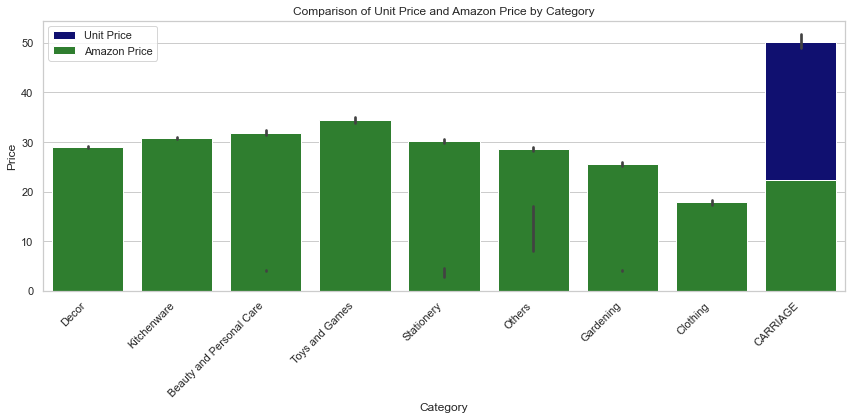

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x="category", y="unit_price", data=data_new, color="navy", label="Unit Price")
sns.barplot(x="category", y="amazon price", data=data_new, color="forestgreen", label="Amazon Price")

# Customize the plot
plt.xlabel("Category")
plt.ylabel("Price")
plt.title("Comparison of Unit Price and Amazon Price by Category")
plt.xticks(rotation=45, ha="right")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()



In [136]:

# Find the category with the highest "unit_price"
best_unit_price_category = data_new.loc[data_new["unit_price"].idxmax()]["category"]

# Find the category with the highest "Amazon price"
best_amazon_price_category = data_new.loc[data_new["amazon price"].idxmax()]["category"]

# Compare the best-selling categories
if best_unit_price_category == best_amazon_price_category:
    print(f"The best-selling category based on both unit price and Amazon price is: {best_unit_price_category}")
else:
    print(f"The best-selling category based on unit price is: {best_unit_price_category}")
    print(f"The best-selling category based on Amazon price is: {best_amazon_price_category}")


The best-selling category based on unit price is: Others
The best-selling category based on Amazon price is: Kitchenware


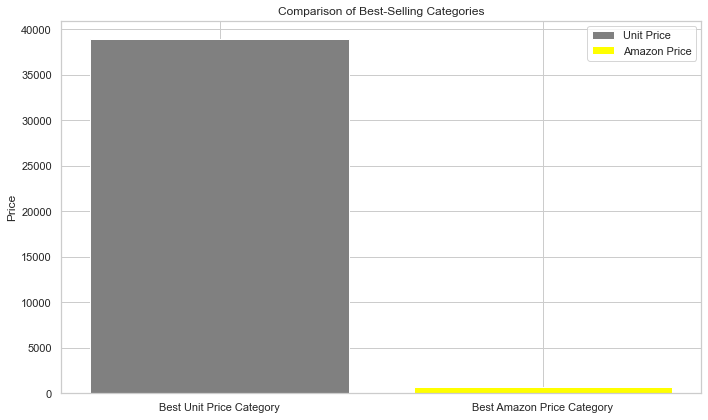

In [137]:
# Find the category with the highest "unit_price"
best_unit_price_category = data_new.loc[data_new["unit_price"].idxmax()]

# Find the category with the highest "Amazon price"
best_amazon_price_category = data_new.loc[data_new["amazon price"].idxmax()]

# Create a bar chart to visualize the comparison
plt.figure(figsize=(10, 6))
plt.bar("Best Unit Price Category", best_unit_price_category["unit_price"], label="Unit Price", color="grey")
plt.bar("Best Amazon Price Category", best_amazon_price_category["amazon price"], label="Amazon Price", color="yellow")

plt.ylabel("Price")
plt.title("Comparison of Best-Selling Categories")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

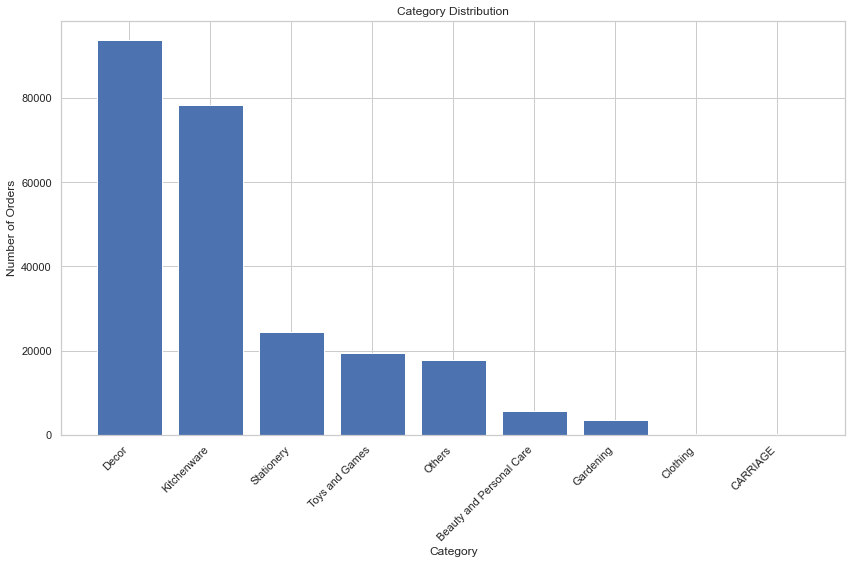

In [138]:

# Count the occurrences of each category
category_counts = data_new['category'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.title("Category Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


In [139]:
for countr in data_new['country'].unique():
    print(countr)

United Kingdom
France
Australia
Netherlands
Germany
Norway
EIRE
Switzerland
Spain
Poland
Portugal
Italy
Belgium
Lithuania
Japan
Iceland
Channel Islands
Denmark
Cyprus
Sweden
Austria
Israel
Finland
Greece
Singapore
Lebanon
United Arab Emirates
Saudi Arabia
Czech Republic
Canada
Unspecified
Brazil
USA
European Community
Bahrain
Malta
RSA


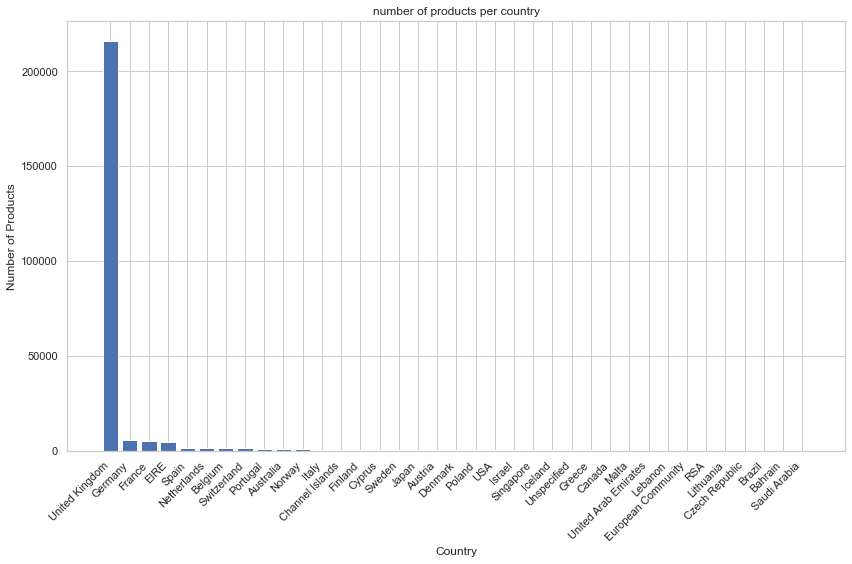

In [140]:
# Count the occurrences of each country
country_counts = data_new['country'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Products")
plt.title("number of products per country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

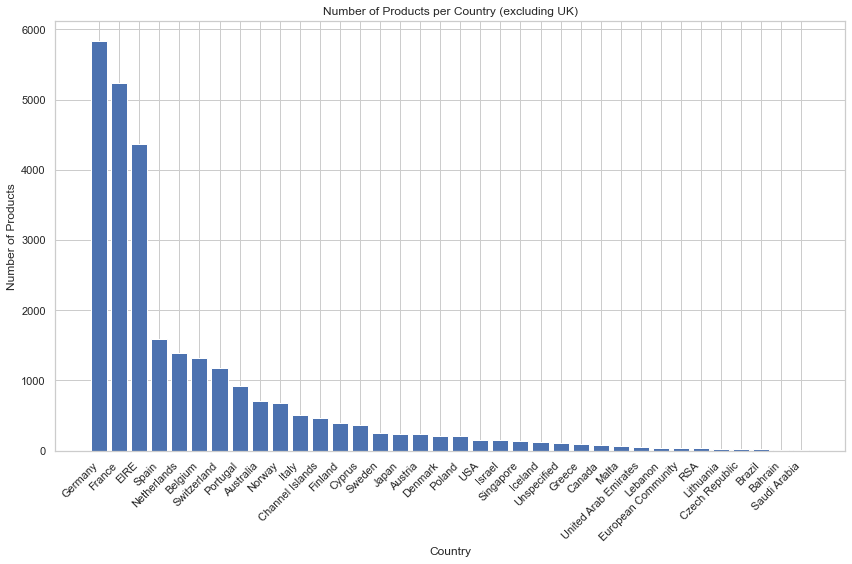

In [141]:
# Count the occurrences of each country
country_counts = data_new['country'].value_counts()

# Exclude "UK" from the plot
country_counts = country_counts[country_counts.index != 'United Kingdom']

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Products")
plt.title("Number of Products per Country (excluding UK)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
data_new